Hello Kagglers,
This is my first Kaggle project, I'm super excited to share my knowledge with the kaggle community and also looking for your valuable suggestions on my notebook. 
I prepared this notebook in such a way that every beginner will understand the code very easily. Lets go through the code.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


Do not worry about the above lines of code, which will be automatically generated by kaggle when you click on "New notebook".

### Workflow 
1. Problem statement
2. Import necessary libraries and datasets
3. Explore the data
4. Data preprocessing
   - 4a) Dealing with missing values
5. Identify the patterns & relations
6. Statistical overview
7. Feature Engineering
   - 7a) Converting categorical data into numerical data
8. Modelling and Prediction
9. Submit the results

### 1.Problem Statement
Every one of us know that the Titanic ship hit an iceburg and sank in the early morning on 15th April 1912, resulting 1503 people deaths out of 2208. By watching the Titanic movie, we undertstood that, ship crew members tried to save women,childern first by using lifeboats then they gave priority to the rich people. This truth we can check after solving the project by using different machine learning algorithms. Our problem statement was to predict whether a particular passenger is survived or not.  

### 2. Import necessary libraries and datasets

In [2]:
# Data analysis and wrangling
import pandas as pd    # File read & write operation
import numpy as np     # Linear algebra

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
import statsmodels.formula.api as smf
from pandas.plotting import scatter_matrix

# Machine Learning 
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


In [3]:
train_data=pd.read_csv("../input/titanic/train.csv")  # For reading the data
test_data=pd.read_csv("../input/titanic/test.csv")

### 3. Explore the data

In [4]:
print(train_data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [5]:
print('Shape of train_data:',train_data.shape)
print(train_data.columns.values)       # Checking the column names

Shape of train_data: (891, 12)
['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [6]:
print(test_data.head())

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  


In [7]:
print('Shape of test_data:',test_data.shape)
print(test_data.columns.values)       # Checking the column names

Shape of test_data: (418, 11)
['PassengerId' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare'
 'Cabin' 'Embarked']


Train data we have 12 columns and in test data we have only 11 columns (In test data 'Survived' column is not there, We need to predict this feature with our Machine Learning model).

In [8]:
combine=[train_data,test_data]
# Finding the shape of data i.e. number of rows & columns
print('length of combined_data:',len(combine))

length of combined_data: 2


In [9]:
# Trained data information
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [10]:
# Test data information
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None


#### Type of features
- a) Categorical
     - Nominal (Values serves as labels, which do not have any meaningful order)
         - Cabin
         - Embarked (C,Q,S)
         - Sex (Male, Female)
     - Ordinal (Values have meaningful order)
         - Pclass (1,2,3)
- b) Numeric
    - Discrete
         - Passender ID
         - SibSp
         - Parch
         - Survived
    - Continous
         - Age
         - Fare
- c) Alphanumeric or text features
    - Name
    - Ticket

### 4. Data preprocessing
#### 4a) Dealing with missing values

In [11]:
# Missing values in trained data
print(train_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


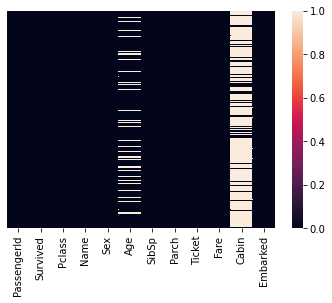

In [12]:
# Another way of checking missing values is by using heatmap
sns.heatmap(train_data.isnull(),yticklabels=False)

In [13]:
def missing_percent(df):
    """This function will calculate the percentage of missing values in each column. The input will be dataframe and 
    the output will show as two columns"""
    total=df.isnull().sum().sort_values(ascending=False)
    percentage=round(total*100/len(df),2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [14]:
missing_percent(train_data)

,Total,Percentage
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22
Fare,0,0.00
Ticket,0,0.00
Parch,0,0.00
SibSp,0,0.00
Sex,0,0.00
Name,0,0.00
Pclass,0,0.00


There are missing values in below features: <br>
- Cabin    : 687  (77% of train data)      
- Age      : 177  (19.8% of train data)
- Embarked : 2    (0.2% of train data)

Almost 77% of the cabin column having missing data. So, we are going to remove this column from the training data set. 
We are going to fill the missing values in 'Age' column and in the 'Embarked' column we are going to replace with most common occurance (i.e.mode).

First we will try to fill the missing values in train data set, then we will repeat the same steps in test data set.

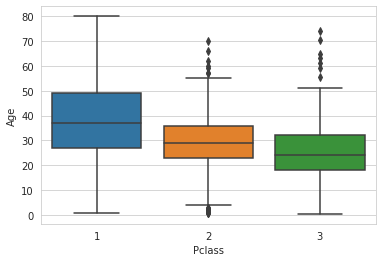

In [15]:
sns.set_style("whitegrid")
sns.boxplot(x='Pclass',y='Age',data=train_data,)

Above box plot of the training data will helps us, to identify what is the mean age in each of the 'Pclass'.
- Mean age in Pclass 1 is 37.
- Mean age in Pclass 2 is 29.
- Mean age in Pclass 3 is 24.

Below function will replace the missing values in 'Age' column based on its class(1 or 2 or 3) with the above mean values.

In [16]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else: 
            return 24
    else:
        return Age

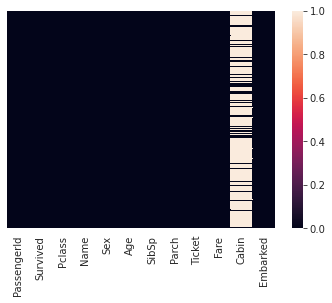

In [17]:
train_data['Age']=train_data[['Age','Pclass']].apply(impute_age,axis=1)
sns.heatmap(train_data.isnull(),yticklabels=False)

In [18]:
# Missing values in test data
print(test_data.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [19]:
missing_percent(test_data)

,Total,Percentage
Cabin,327,78.23
Age,86,20.57
Fare,1,0.24
Embarked,0,0.00
Ticket,0,0.00
Parch,0,0.00
SibSp,0,0.00
Sex,0,0.00
Name,0,0.00
Pclass,0,0.00


There are missing values in below features: <br>
- Cabin    : 327 (78.2% of test data)
- Age      : 86  (20.6% of test data)
- Fare     : 1   (0.2% of test data)

Almost 78% of the cabin column having missing data. So, we are going to remove this column from the test data set. 
We are going to fill the missing values in 'Age' column and in the 'Fare' column we have only one missing values. So, I'm going replace this value with the most common occurance value(i.e. with mode) of the fare column.

Now we are not observing any missing values in 'Age' column in training data set.

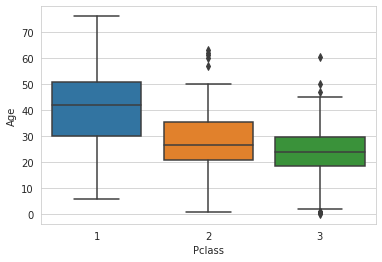

In [20]:
sns.set_style("whitegrid")
sns.boxplot(x='Pclass',y='Age',data=test_data)

Above box plots of the test data will helped me, to identify what is the mean age in each of the 'Pclass'.
- Mean age in Pclass 1 is 42.
- Mean age in Pclass 2 is 27.
- Mean age in Pclass 3 is 25.

In [21]:
def impute_age_test(cols1):
    Age=cols1[0]
    Pclass=cols1[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 42
        elif Pclass==2:
            return 27
        else: 
            return 25
    else:
        return Age

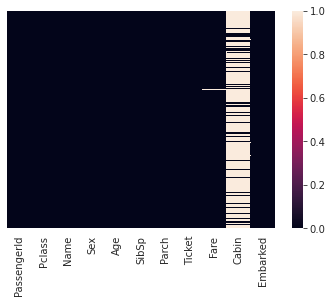

In [22]:
test_data['Age']=test_data[['Age','Pclass']].apply(impute_age_test,axis=1)
sns.heatmap(test_data.isnull(),yticklabels=False)

Now we are not observing any missing values in 'Age' column in test data set.

As we discussed earlier, morethan 77% of the data is missing in 'Cabin' column from both Train & Test data sets. So, we are going to remove this feature from the data sets.

In [23]:
train_data.drop('Cabin',axis=1,inplace=True)
test_data.drop('Cabin',axis=1,inplace=True)

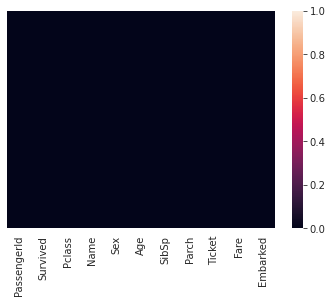

In [24]:
sns.heatmap(train_data.isnull(),yticklabels=False)

Now we will work on 'Embarked' column missing values in the train data.

In [25]:
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0],inplace=True)

In [26]:
print(train_data.isnull().sum())
print('shape of train data: ',train_data.shape)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
shape of train data:  (891, 11)


Now we will work on 'Fare' column missing value in the test data.

In [27]:
test_data['Fare'].fillna(test_data['Fare'].mode()[0],inplace=True)

In [28]:
print(test_data.isnull().sum())
print('shape of test data: ',test_data.shape)

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
shape of test data:  (418, 10)


### 5. Identify the patterns and relations

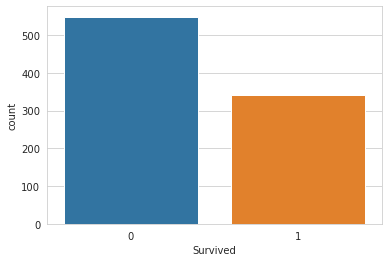

In [29]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train_data)

This count plot shows 
- around 550 people did not survive and around 340 people survived out of 891 (i.e. Train data)

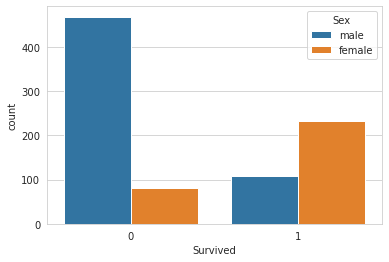

In [30]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train_data)

This count plot shows 
- among all the males 470 did not survived and around 110 survived. 
- Out of all female around 85 did not survive and around 235 survived out of 891 (i.e. Train data).

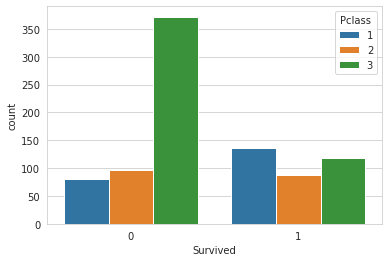

In [31]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train_data)

This count plot shows
- More number of Pclass 3 (Third class) passengers did not survive(around 370 passengers died).
- More number of Pclass 1 (First class) passengers survived(around 140 passengers saved)

In [32]:
train_data[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


- 62.9% of Pclass 1 (First class) passengers survived.
- 47.3% of Pclass 2 (Second class) passengers survived.
- 24.2% of Pclass 3 (Third class) passengers survived.

In [33]:
train_data[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


- 74.2% of females survived.
- 18.8% of males survived.

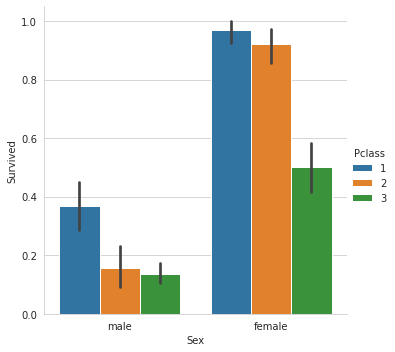

In [34]:
sns.catplot(x='Sex',y='Survived',hue='Pclass', kind='bar',data=train_data)

- Around 38% of male & 95% of female survived in Pclass 1 (First class).
- Around 16% of male & 90% of female survived in Pclass 2 (Second class).
- Around 14% of male & 50% of female survived in Pclass 3 (Third class).

In [35]:
train_data[['SibSp','Survived']].groupby(['SibSp'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


- 53.6% of passengers survived who is having 1 Sibling/Spouse.
- No passenger survived with greater than 5 number of Sibling/Spouse.

In [36]:
train_data[['Parch','Survived']].groupby(['Parch'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


- 60% of passengers survived who is having 3 number of parents/children aboard.
- No passenger survived with morethan 4 number of parents/children aboard.

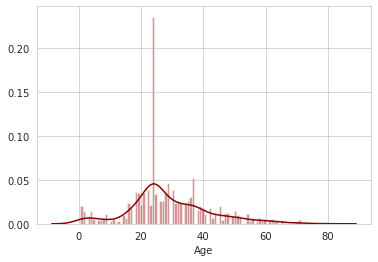

In [37]:
sns.distplot(train_data['Age'],kde=True,bins=100,color='darkred')

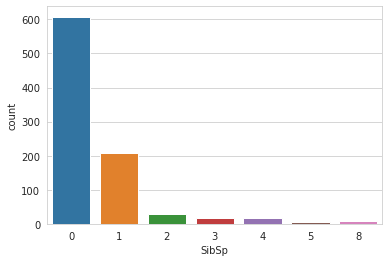

In [38]:
sns.countplot(x='SibSp',data=train_data)

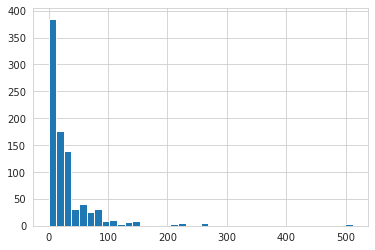

In [39]:
train_data['Fare'].hist(bins=40)

### 6. Statistical Overview

In [40]:
print(train_data.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.066409    0.523008   
std     257.353842    0.486592    0.836071   13.244532    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   26.000000    0.000000   
75%     668.500000    1.000000    3.000000   37.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [41]:
print(test_data.describe())

       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  418.000000  418.000000  418.000000  418.000000
mean   1100.500000    2.265550   29.577751    0.447368    0.392344   35.560497
std     120.810458    0.841838   12.924561    0.896760    0.981429   55.857145
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   23.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   25.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   36.375000    1.000000    0.000000   31.471875
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200


### 7. Feature Engineering
#### 7a) Converting Categorical Features

In [42]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [43]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [44]:
pd.get_dummies(train_data['Embarked'],drop_first=True).head()
pd.get_dummies(test_data['Embarked'],drop_first=True).head()

,Q,S
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1


In [45]:
sex_1=pd.get_dummies(train_data['Sex'],drop_first=True)
embark_1=pd.get_dummies(train_data['Embarked'],drop_first=True)
sex_2=pd.get_dummies(test_data['Sex'],drop_first=True)
embark_2=pd.get_dummies(test_data['Embarked'],drop_first=True)

In [46]:
train_data.drop(['Name','Sex','Ticket','Embarked'],axis=1,inplace=True)
test_data.drop(['Name','Sex','Ticket','Embarked'],axis=1,inplace=True)

In [47]:
train_data=pd.concat([train_data,sex_1,embark_1],axis=1)
test_data=pd.concat([test_data,sex_2,embark_2],axis=1)

In [48]:
train_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [49]:
test_data.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1


In [50]:
# Correlation 
pd.DataFrame(abs(train_data.corr()['Survived']).sort_values(ascending=False))

,Survived
Survived,1.000000
male,0.543351
Pclass,0.338481
Fare,0.257307
S,0.149683
Parch,0.081629
Age,0.047255
SibSp,0.035322
PassengerId,0.005007
Q,0.003650


Out of all the independent features, Sex is having highest positive coefficient which means Sex is playing major role to predict the dependent feature (Survived).

In [51]:
print(train_data.shape)
print(test_data.shape)

(891, 10)
(418, 9)


In [52]:
X_train=train_data.drop('Survived',axis=1)  # Removing the dependent feature from the train data
y_train=train_data['Survived']
X_test=test_data  
# we have to predict y_test (i.e. y_pred)

### 8. Modeling and Prediction

Our problem will come under classification (i.e. have to predict whether passenger survived or not). I'm considering few of the classification algorithms for predicting the results.

In [53]:
print('Shape of X_train',X_train.shape)
print('Shape of y_train',y_train.shape)
print('Shape of X_test',X_test.shape)

Shape of X_train (891, 9)
Shape of y_train (891,)
Shape of X_test (418, 9)


In [54]:
# Logistic Regression

logreg=LogisticRegression()
logreg.fit(X_train,y_train)
y_pred_lr=logreg.predict(X_test)
accuracy_logistic=logreg.score(X_train, y_train)
print('Accuracy score by using logistic regression is:',round(accuracy_logistic,2))

Accuracy score by using logistic regression is: 0.79


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [55]:
# Decision Tree

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred_dt = dtc.predict(X_test)
accuracy_decision=dtc.score(X_train, y_train)
print('Accuracy score by using Decision tree is:',round(accuracy_decision,2))

Accuracy score by using Decision tree is: 1.0


In [56]:
# Random Forest

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
accuracy_randomforest=rf.score(X_train, y_train)
print('Accuracy score by using Random forest is:',round(accuracy_randomforest,2))

Accuracy score by using Random forest is: 1.0


In [57]:
# Gaussian naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred_gn = gaussian.predict(X_test)
accuracy_gaussian=gaussian.score(X_train, y_train)
print('Accuracy score by using Gaussian is:',round(accuracy_gaussian,2))

Accuracy score by using Gaussian is: 0.79


In [58]:
# Support Vector Machines

svc=SVC()
svc.fit(X_train,y_train)
y_pred_sv=svc.predict(X_test)
accuracy_svc=svc.score(X_train, y_train)
print('Accuracy score by using SVM is:',round(accuracy_svc,2))

Accuracy score by using SVM is: 0.66


In [59]:
# K-Nearest Neighbor

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred_kn = knn.predict(X_test)
accuracy_knn=knn.score(X_train, y_train)
print('Accuracy score by using KNN is:',round(accuracy_knn,2))

Accuracy score by using KNN is: 0.8


In [60]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','Decision Tree','Random Forest','Naive Bayes','Support Vector Machines', 'KNN'],'Score': [accuracy_logistic, accuracy_decision, accuracy_randomforest,accuracy_gaussian, accuracy_svc,accuracy_knn]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,Decision Tree,1.000000
2,Random Forest,1.000000
5,KNN,0.801347
3,Naive Bayes,0.790123
0,Logistic Regression,0.787879
4,Support Vector Machines,0.664422


The above score will tell us how confident our model is on the training data. Decision tree, Random forest is giving very good score. So, I'm going to use Random Forest algorithm prediction results on test data for submitting the results.

### 9. Submit the results

In [61]:
submission=pd.DataFrame({'PassengerId':test_data['PassengerId'],'Survived':y_pred_rf})
submission.to_csv('C://Users//santh//Kaggle Projects/titanic_submission1.csv',index=False)

In [62]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
